Importing the necessary ***libraries***

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # used because the normal cv2.imshow crashes colab
import random # used to display keypoints with random color in corner detection
import pandas as pd
import time
import matplotlib.pyplot as plt
import struct
import yaml



```
# Here it is necessary to normalize kernel coefficients
```



In [ ]:
# Load image from file
img = cv2.imread("gauss.png")

In [ ]:
def gaussian_smoothing(img):


    # Create filter kernel
    gauss_data = np.array([[1, 4, 7, 4, 1],
                           [4, 16, 26, 16, 4],
                           [7, 26, 41, 26, 7],
                           [4, 16, 26, 16, 4],
                           [1, 4, 7, 4, 1]], dtype=np.float32)
    kernel = gauss_data / np.sum(gauss_data)

    # Apply filter
    result = cv2.filter2D(img, -1, kernel, borderType=cv2.BORDER_DEFAULT)

    return result

In [ ]:
def gaussian_smoothing_without_normalization(img):


    # Create filter kernel
    gauss_data = np.array([[1, 4, 7, 4, 1],
                           [4, 16, 26, 16, 4],
                           [7, 26, 41, 26, 7],
                           [4, 16, 26, 16, 4],
                           [1, 4, 7, 4, 1]], dtype=np.float32)
    #kernel = gauss_data / np.sum(gauss_data)

    # Apply filter
    result = cv2.filter2D(img, -1, gauss_data, borderType=cv2.BORDER_DEFAULT)

    return result

In [ ]:
result = gaussian_smoothing(img)
result_without_normalization = gaussian_smoothing_without_normalization(img)

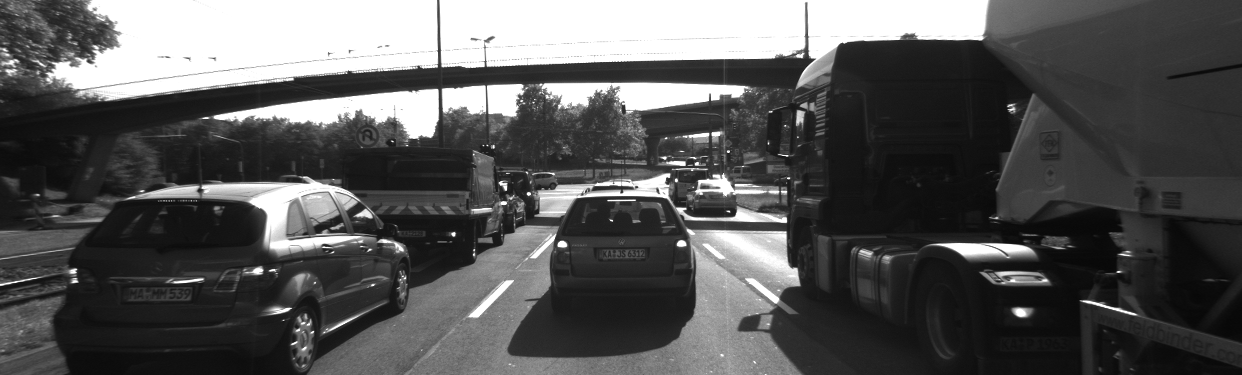

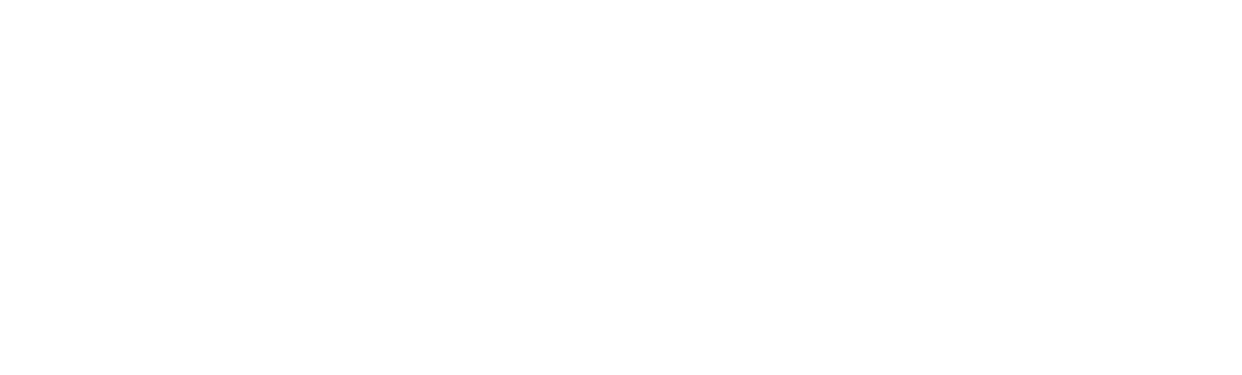

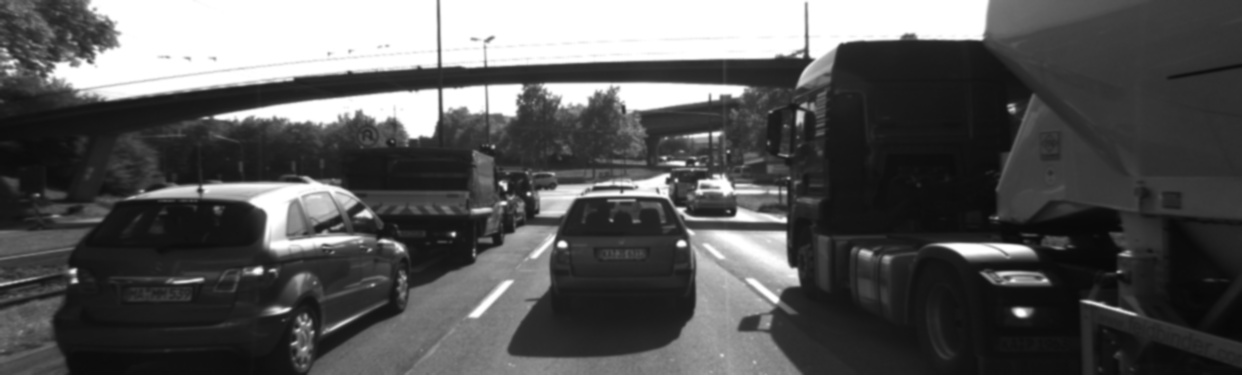

In [ ]:
# Show result and previous photo comparison
# the original image
cv2_imshow(img) # I used cv2_imshow instead of cv2.imshow because it is disabled by google colab
#cv2.waitKey(0)

#Here is the photo without Normalization
cv2_imshow(result_without_normalization)
#cv2.waitKey(0)

# The resulting image
window_name = "Gaussian Blurring" # window name to be used if run on a jupyter because it supports opencv2.imshow
cv2_imshow(result)
#cv2.waitKey(0)  # Wait for keyboard input before continuing



# Comments on non-normalized photo
# Receiving a blank photo after applying the Gaussian filter without the normalization step is a possible outcome. Without normalizing the kernel coefficients, the sum of the elements in the kernel might not be 1, as required for proper Gaussian smoothing. This deviation from the sum of 1 could lead to an extreme or incorrect smoothing effect, resulting in a blank or nearly blank image.

#The unnormalized kernel coefficients could cause the filter to heavily distort the image, potentially amplifying certain pixel values or introducing artifacts.
#In extreme cases, this distortion could result in a completely blank image, where all pixel values are very close to zero.
#To avoid this issue and ensure the correct application of the Gaussian filter, it's essential to normalize the kernel coefficients before applying the filter.





In [ ]:
# the image for gradient
img = cv2.imread("gaussrgb.png")

# Convert image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


##Calculating Gradient of Intensity
The **equations** are as follows:


1.   $$ \frac{\partial i}{\partial x} \approx \frac{i(x_{n+1}, y) - i(x_{n}, y)}{\Delta x} $$

2.   $$ \frac{\partial i}{\partial y} \approx \frac{i(x, y_{n+1}) - i(x, y_{n-1})}{2\Delta y} $$


The gradient **vector**  is resolved as follows:


1.   $$ \theta = \arctan\left(\frac{\partial i}{\partial x} \over \frac{\partial i}{\partial y}\right) $$

2.   $$ \|\nabla i\| = \sqrt{\left(\frac{\partial i}{\partial x}\right)^2 + \left(\frac{\partial i}{\partial y}\right)^2} $$










In [ ]:
def gradient_sobel(img_gray):


    # Create filter kernel for x-direction
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]], dtype=np.float32)

    # Apply filter for x-direction
    result_x = cv2.filter2D(img_gray, -1, sobel_x)

    # Create filter kernel for y-direction
    sobel_y = np.array([[-1, -2, -1],
                        [0, 0, 0],
                        [1, 2, 1]], dtype=np.float32)

    # Apply filter for y-direction
    result_y = cv2.filter2D(img_gray, -1, sobel_y)


    return result_x,result_y


In [ ]:
def magnitude_sobel(img_gray):


    # Apply smoothing using GaussianBlur
    img_blurred = cv2.GaussianBlur(img_gray, (5, 5), 2.0)

    # Define Sobel filters
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1],
                        [0, 0, 0],
                        [1, 2, 1]])

    # Apply filters
    img_filtered_x = cv2.filter2D(img_blurred, -1, sobel_x)
    img_filtered_y = cv2.filter2D(img_blurred, -1, sobel_y)

    # Compute magnitude image
    img_filtered_x = img_filtered_x.astype(np.float32)  # Convert to float32
    img_filtered_y = img_filtered_y.astype(np.float32)  # Convert to float32
    img_mag = np.sqrt(img_filtered_x ** 2 + img_filtered_y ** 2)
    img_mag = np.clip(img_mag, 0, 255)  # Clip values to [0, 255]
    img_mag = img_mag.astype(np.uint8)  # Convert back to uint8

    return img_mag






In [ ]:

def magnitude_sobel_alternate(img_gray):
    # apply smoothing using the GaussianBlur() function from OpenCV
    kernel_size = 5
    std_deviation = 2.0
    img_blurred = cv2.GaussianBlur(img_gray, (kernel_size, kernel_size), std_deviation)

    # create filter kernels both for x and y
    sobel_x = cv2.Sobel(img_blurred, cv2.CV_32F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(img_blurred, cv2.CV_32F, 0, 1, ksize=3)

    # compute magnitude image
    img_mag = cv2.magnitude(sobel_x, sobel_y)

    # normalize the magnitude image to the range [0, 255]
    img_mag = cv2.normalize(img_mag, None, 0, 255, cv2.NORM_MINMAX)

    # convert to 8-bit type
    img_mag = np.uint8(img_mag)

    return img_mag



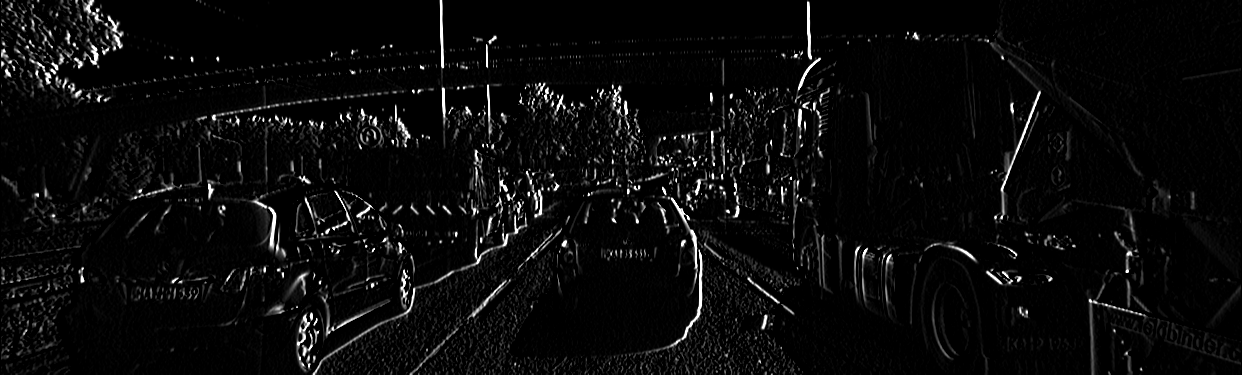

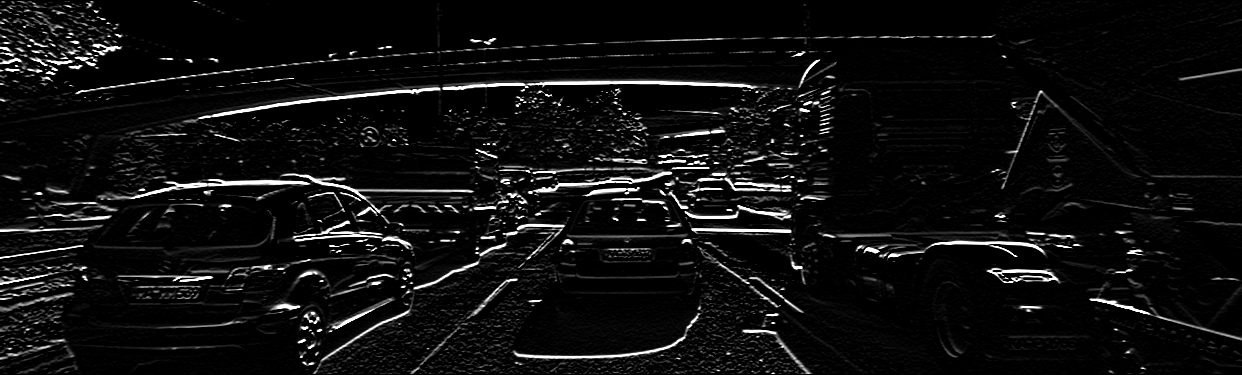

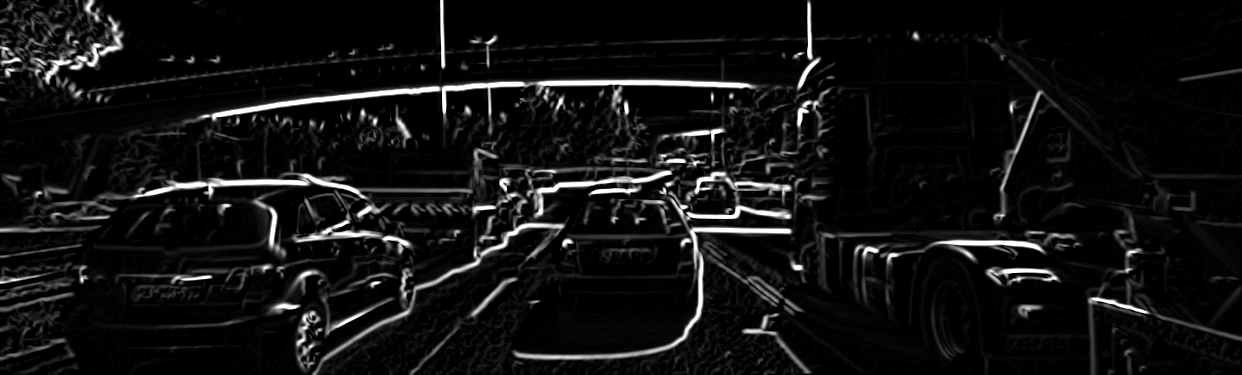

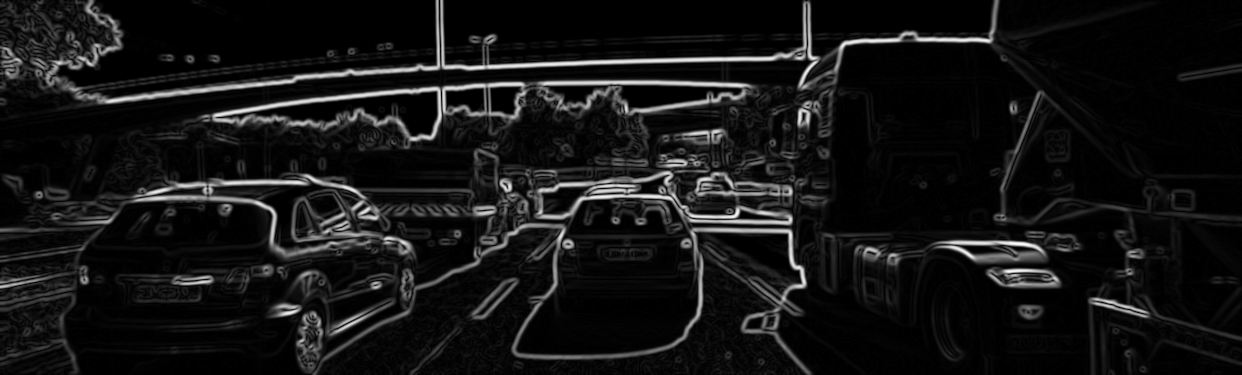

In [ ]:
result_x,result_y = gradient_sobel(img_gray)
img_mag = magnitude_sobel(img_gray)
img_mag_alt = magnitude_sobel_alternate(img_gray)

# Show results
cv2_imshow( result_x)
cv2_imshow(result_y)
# Show result
cv2_imshow(img_mag)
cv2_imshow(img_mag_alt)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Now After calculating the gradient we can use the change to highlight corner points that include transitions(keypoints)

Below is the derivation of the H matrix:



*  $$ I(x + u, y + v) \approx I(x, y) + \frac{\partial I}{\partial x}u + \frac{\partial I}{\partial y}v $$
*   $$ I(x + u, y + v) \approx I(x, y) + \begin{bmatrix} \frac{\partial I}{\partial x} & \frac{\partial I}{\partial y} \end{bmatrix} \begin{bmatrix} u \\ v \end{bmatrix} $$





*  $$ E(u, v) \approx \sum_{(x,y) \in w} \left[ I_x(x,y) + [I_x I_y] \begin{bmatrix} u \\ v \end{bmatrix} - I_{xx}(x,y) \right]^2 $$


*   $$ \approx \sum_{(x,y) \in w} \left[ \begin{bmatrix} I_x & I_y \end{bmatrix} \begin{bmatrix} u \\ v \end{bmatrix} \right]^2 $$

*   $$ \approx \sum_{(x,y) \in w} \begin{bmatrix} u & v \end{bmatrix}  \begin{bmatrix} I_x^2 & I_xI_y \\ I_xI_y & I_y^2 \end{bmatrix} \begin{bmatrix} u \\ v \end{bmatrix} = H $$









The larger eigenvector points into the direction of maximal intensity change, whereas the smaller eigenvector points into the direction of minimal change. So in order to identify corners, we need to find positions in the image which have two significantly large eigenvalues of H(covariance matrix).


---



Below are the eigenvalues :

$$
\lambda_{\text{max\_min}} = \frac{1}{2} \left( (I_x^2 + I_y^2) \pm \sqrt{4 \cdot(I_x  I_y)^2 +  ({I_{x}^2 - I_{y}^2)^2} } \right)
$$




In [ ]:
def harris_corner_detector(img_gray):



    # Detector parameters
    blockSize = 2  # for every pixel, a blockSize × blockSize neighborhood is considered
    apertureSize = 3  # aperture parameter for Sobel operator (must be odd)
    k = 0.04  # Harris parameter

    # Detect Harris corners
    dst = cv2.cornerHarris(img_gray, blockSize, apertureSize, k)

    # Normalize output
    dst_norm = np.empty_like(dst)
    cv2.normalize(dst, dst_norm, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

    # Convert to 8-bit unsigned integer
    dst_norm_scaled = cv2.convertScaleAbs(dst_norm)

    return dst_norm_scaled





In [ ]:


def detect_corners(gray):


    # Detector parameters
    blockSize = 2     # for every pixel, a blockSize × blockSize neighborhood is considered
    apertureSize = 3  # aperture parameter for Sobel operator (must be odd)
    minResponse = 100 # minimum value for a corner in the 8bit scaled response matrix
    k = 0.04          # Harris parameter (see equation for details)

    # Detect Harris corners and normalize output
    dst = cv2.cornerHarris(gray, blockSize, apertureSize, k)
    dst_norm = np.empty_like(dst)
    cv2.normalize(dst, dst_norm, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32FC1)

    # Convert to 8-bit integer
    dst_norm_scaled = cv2.convertScaleAbs(dst_norm)
    return dst_norm_scaled

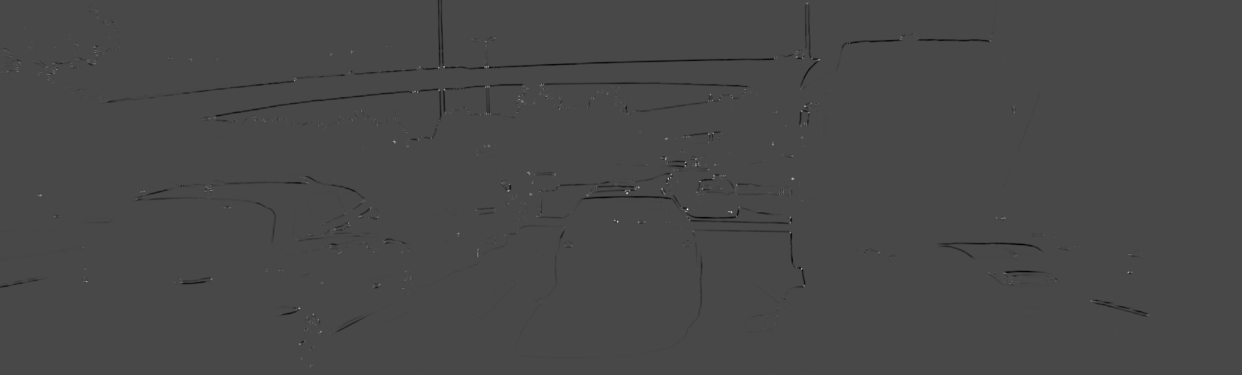

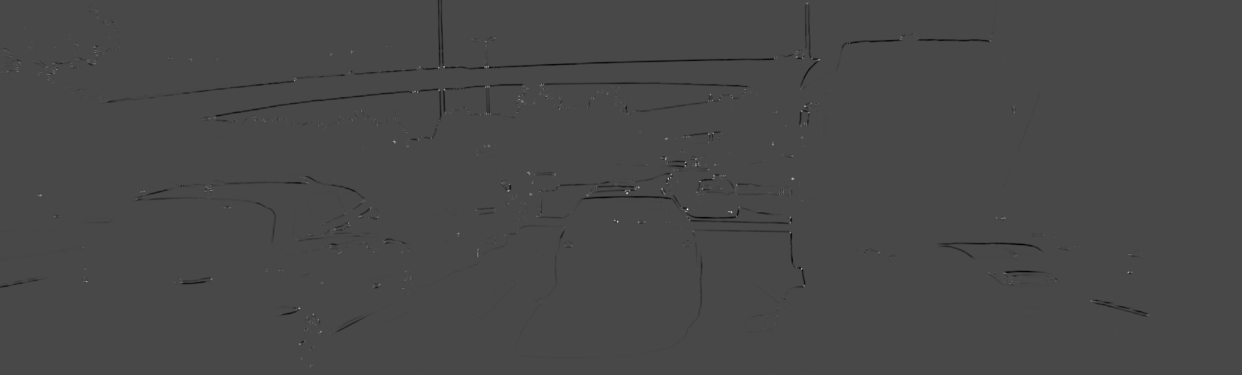

In [ ]:
img_harris = detect_corners(img_gray)
img_harris2 = harris_corner_detector(img_gray)

cv2_imshow(img_harris)
cv2_imshow(img_harris2)

In [ ]:
def select_harris_corners(img_gray):
    # Detector parameters
    block_size = 2   # for every pixel, a blockSize × blockSize neighborhood is considered
    aperture_size = 3  # aperture parameter for Sobel operator (must be odd)
    min_response = 100  # minimum value for a corner in the 8bit scaled response matrix
    k = 0.04  # Harris parameter

    # Detect Harris corners
    dst = cv2.cornerHarris(img_gray, block_size, aperture_size, k)

    # Normalize output
    dst_norm = np.empty_like(dst)
    cv2.normalize(dst, dst_norm, 0, 255, cv2.NORM_MINMAX, cv2.CV_32FC1)

    # Locate local maxima in the Harris response matrix
    keypoints = []
    max_overlap = 0.0
    for j in range(dst_norm.shape[0]):
        for i in range(dst_norm.shape[1]):
            response = dst_norm[j, i]
            if response > min_response:
                new_keypoint = cv2.KeyPoint()
                new_keypoint.pt = (i, j)
                new_keypoint.size = 2 * aperture_size
                new_keypoint.response = response

                # Perform non-maximum suppression (NMS) in a local neighborhood around each maximum
                is_overlapped = False
                for kp in keypoints:
                    overlap = cv2.KeyPoint.overlap(new_keypoint, kp)
                    if overlap > max_overlap:
                        is_overlapped = True
                        if new_keypoint.response > kp.response:
                            kp = new_keypoint  # Replace the keypoint with a higher response one
                            break

                # Add the new keypoint if it doesn't overlap with keypoints already stored
                if not is_overlapped:
                    keypoints.append(new_keypoint)

    return keypoints




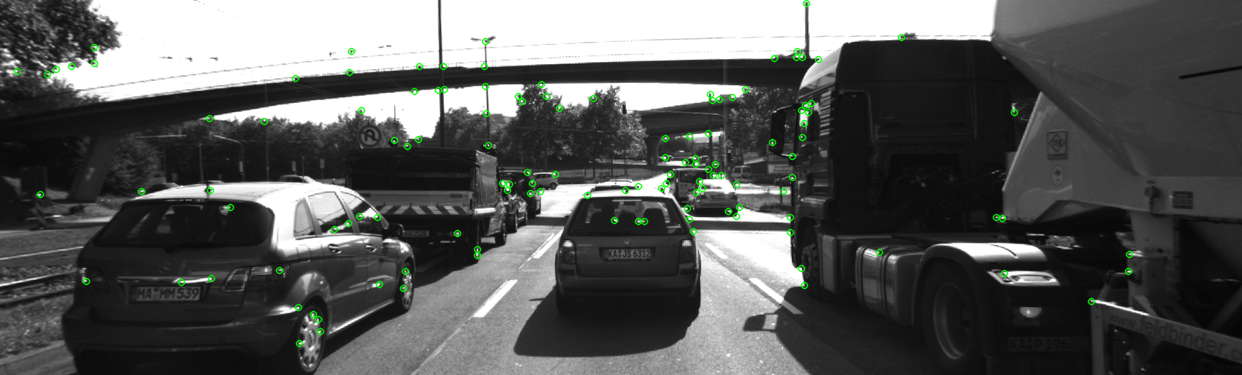

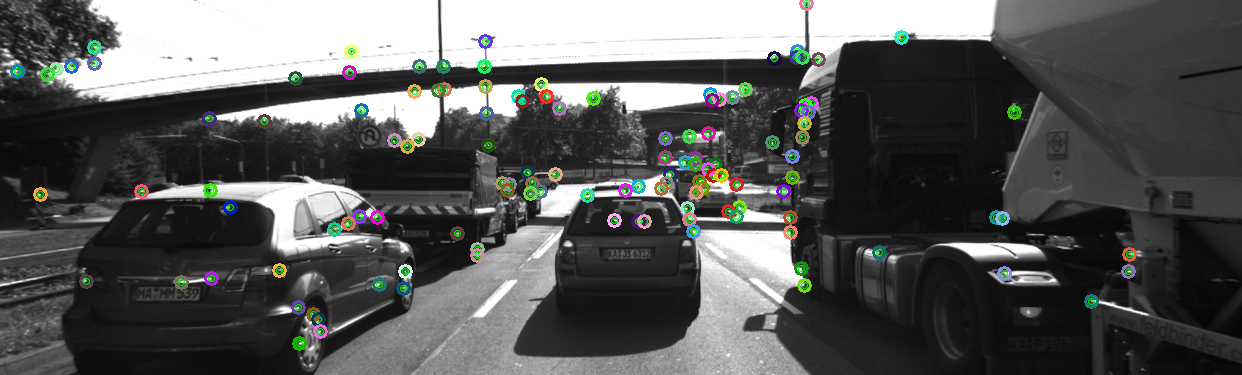

In [ ]:
# Detect Harris corners
keypoints = select_harris_corners(img_gray)

# Visualize results
img_corners = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)
cv2.drawKeypoints(img_gray, keypoints, img_corners, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the image
cv2_imshow(img_corners)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Assign a random color to each circle
for kp in keypoints:
    color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    cv2.circle(img_corners, (int(kp.pt[0]), int(kp.pt[1])), int(kp.size), color, 2)

# Display the image
cv2_imshow(img_corners)
cv2.waitKey(0)
cv2.destroyAllWindows()







#Now in this section we will compare the different keypoint detectors

In [ ]:
def detect_keypoints(img_gray):
    # Parameters for Shi-Tomasi detector
    blockSize = 6
    maxOverlap = 0.0
    minDistance = (1.0 - maxOverlap) * blockSize
    maxCorners = img_gray.shape[0] * img_gray.shape[1] / max(1.0, minDistance)
    qualityLevel = 0.01
    k = 0.04
    useHarris = False

    # Parameters for FAST detector
    threshold = 30
    useNonMaxSuppression = True

    # Detect keypoints using Shi-Tomasi
    start_time = time.time()
    corners = cv2.goodFeaturesToTrack(img_gray, maxCorners=int(maxCorners), qualityLevel=qualityLevel, minDistance=int(minDistance), blockSize=blockSize, useHarrisDetector=useHarris, k=k)
    shi_tomasi_time = (time.time() - start_time)*1000
    shi_tomasi_keypoints = len(corners)

    # Detect keypoints using FAST
    fast = cv2.FastFeatureDetector_create(threshold=threshold, nonmaxSuppression=useNonMaxSuppression)
    start_time = time.time()
    keypoints = fast.detect(img_gray, None)
    fast_time = (time.time() - start_time) * 1000
    fast_keypoints = len(keypoints)

    # Create DataFrame
    data = {'Detector': ['Shi-Tomasi', 'FAST'],
            'Time (ms)': [shi_tomasi_time, fast_time],
            'Number of Keypoints': [shi_tomasi_keypoints, fast_keypoints]}

    df = pd.DataFrame(data)
    print(df)




In [ ]:
detect_keypoints(img_gray)

     Detector  Time (ms)  Number of Keypoints
0  Shi-Tomasi  25.912762                 1144
1        FAST   1.051426                 1864


  # Descriptors
  ## Binary vs Gradient based in terms of :-


*   Number of keypoints detected and their descriptors
*   The time taken by detector and descriptor

*   Their locations in the image






In [ ]:


def descKeypoints1(img, img_gray):
    # BRISK detector / descriptor
    brisk = cv2.BRISK_create()
    kpts_brisk = brisk.detect(img_gray, None)
    kpts_brisk, desc_brisk = brisk.compute(img_gray, kpts_brisk)

    # Print BRISK results
    print("BRISK detector with n=", len(kpts_brisk), "keypoints.")

    # Visualize BRISK results
    vis_image_brisk = cv2.drawKeypoints(img, kpts_brisk, None, color=(0,255,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    cv2_imshow(vis_image_brisk)
    cv2.waitKey(0)

    # SIFT detector / descriptor
    sift = cv2.SIFT_create()
    kpts_sift = sift.detect(img_gray, None)
    kpts_sift, desc_sift = sift.compute(img_gray, kpts_sift)

    # Print SIFT results
    print("SIFT detector with n=", len(kpts_sift), "keypoints.")

    # Visualize SIFT results
    vis_image_sift = cv2.drawKeypoints(img, kpts_sift, None, color=(0,255,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    cv2_imshow(vis_image_sift)
    cv2.waitKey(0)







BRISK detector with n= 2896 keypoints.


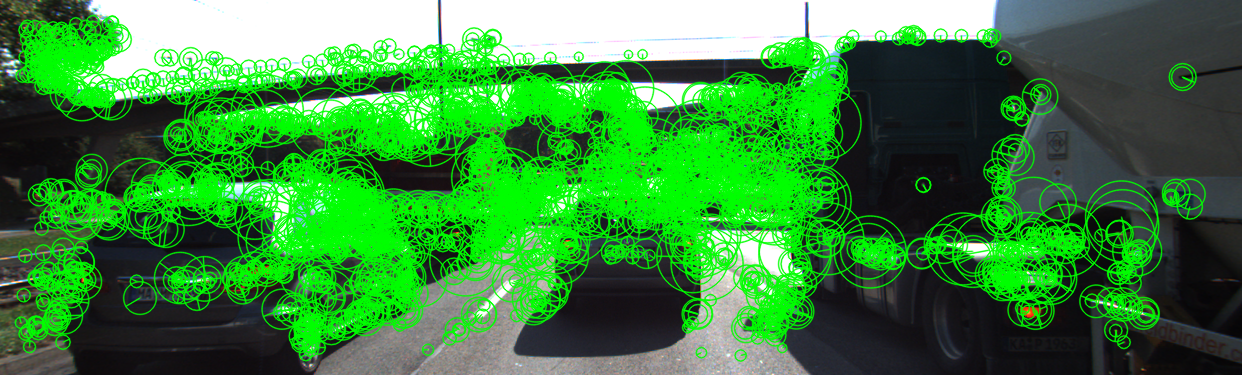

SIFT detector with n= 1890 keypoints.


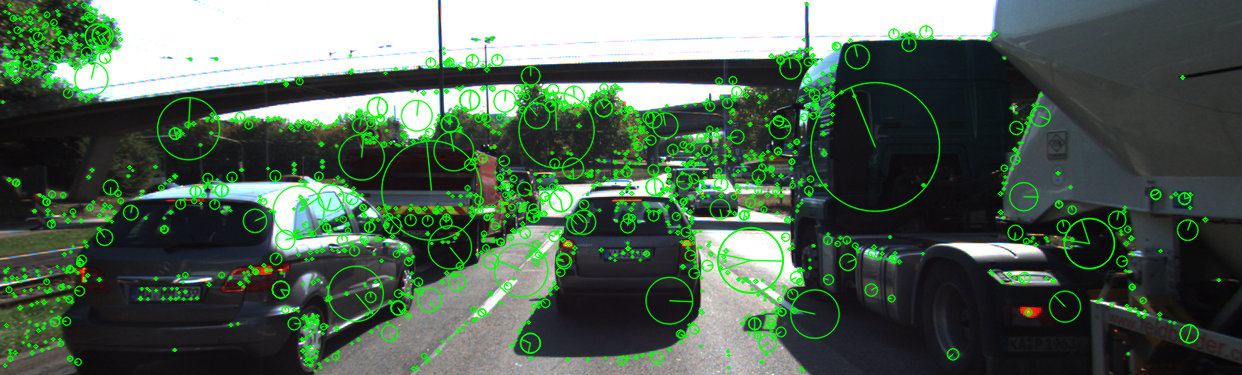

In [ ]:
descKeypoints1(img,img_gray)


In [ ]:


def descParams(img, img_gray):
    # BRISK detector / descriptor
    brisk = cv2.BRISK_create()

    # Measure time for detectAndCompute
    start_time_detect_compute = time.time()
    kpts_brisk, desc_brisk = brisk.detectAndCompute(img_gray, None)
    end_time_detect_compute = time.time()
    detect_compute_time_brisk = end_time_detect_compute - start_time_detect_compute

    # Measure time for detect
    start_time_detect = time.time()
    kpts_brisk_detect = brisk.detect(img_gray, None)
    end_time_detect = time.time()
    detect_time_brisk = end_time_detect - start_time_detect

    # Compute descriptor time by subtracting detect time from detectAndCompute time
    compute_time_brisk = detect_compute_time_brisk - detect_time_brisk

    # Print BRISK results
    #print("BRISK detector with n=", len(kpts_brisk), "keypoints.")
    print("Detector time:", detect_time_brisk*1000, "milliseconds")
    print("Descriptor time:", compute_time_brisk*1000, "milliseconds")



    # SIFT detector / descriptor
    sift = cv2.SIFT_create()

    # Measure time for detectAndCompute
    start_time_detect_compute = time.time()
    kpts_sift, desc_sift = sift.detectAndCompute(img_gray, None)
    end_time_detect_compute = time.time()
    detect_compute_time_sift = end_time_detect_compute - start_time_detect_compute

    # Measure time for detect
    start_time_detect = time.time()
    kpts_sift_detect = sift.detect(img_gray, None)
    end_time_detect = time.time()
    detect_time_sift = end_time_detect - start_time_detect

    # Compute descriptor time by subtracting detect time from detectAndCompute time
    compute_time_sift = detect_compute_time_sift - detect_time_sift

    # Print SIFT results
    #print("SIFT detector with n=", len(kpts_sift), "keypoints.")
    print("Detector time:", detect_time_sift*1000, "milliseconds")
    print("Descriptor time:", compute_time_sift*1000, "milliseconds")





In [ ]:
descParams(img, img_gray)

Detector time: 55.47833442687988 milliseconds
Descriptor time: 22.435665130615234 milliseconds
Detector time: 140.49196243286133 milliseconds
Descriptor time: 119.72880363464355 milliseconds


# Descriptor Matching

1.   $$ \text{SAD} = \sum |d_a - d_b| $$

2.   $$ \text{SSD} = \sum (d_a - d_b)^2 $$



3.   $$ \text{HD} = \text{XOR}(d_a , d_b) $$







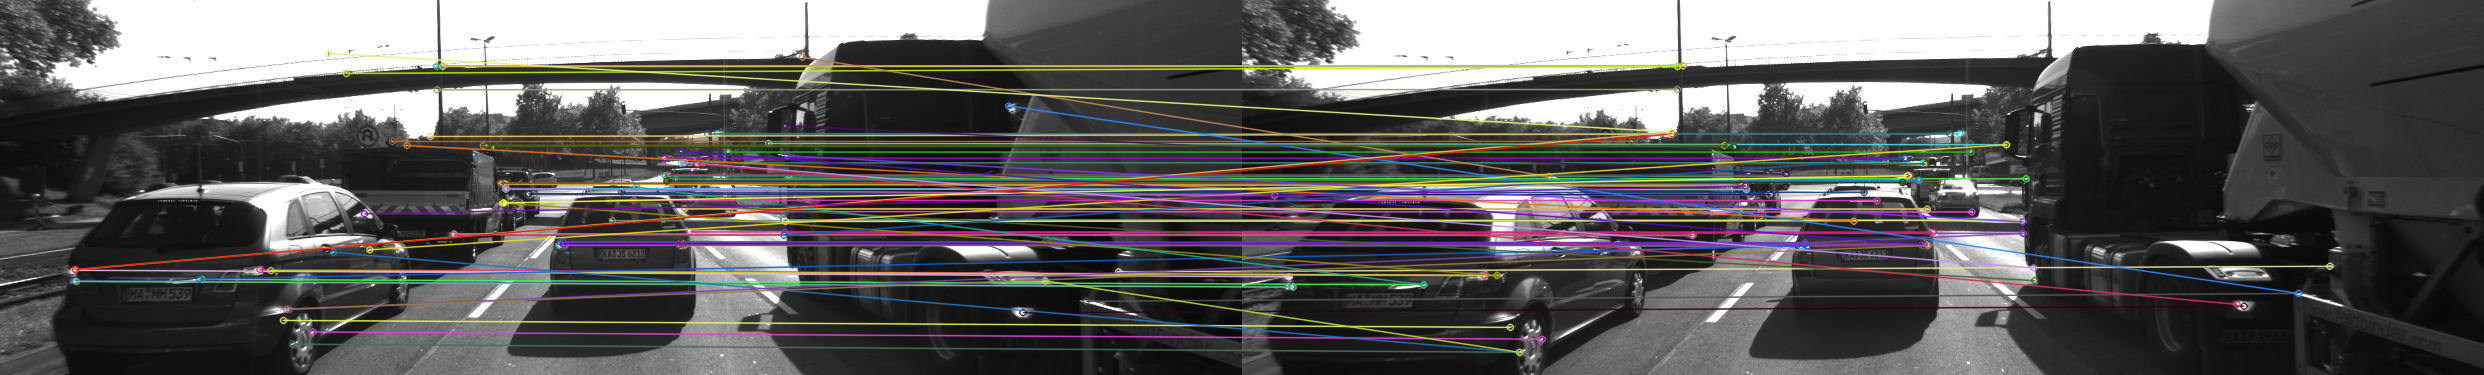

64


In [5]:
# Load the images
img1 = cv2.imread('im1mono.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('im2mono.png', cv2.IMREAD_GRAYSCALE)

# Initialize BRISK detector and descriptor
brisk = cv2.BRISK_create()

# Detect keypoints
keypoints1 = brisk.detect(img1, None)
keypoints2 = brisk.detect(img2, None)

# Sort keypoints based on their response (strength)
keypoints1 = sorted(keypoints1, key=lambda x: x.response, reverse=True)[:100]
keypoints2 = sorted(keypoints2, key=lambda x: x.response, reverse=True)[:100]

# Compute descriptors for the top 100 keypoints
_, descriptors1 = brisk.compute(img1, keypoints1)
_, descriptors2 = brisk.compute(img2, keypoints2)

# Create a BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)

# Match descriptors
matches = bf.match(descriptors1, descriptors2)

# Sort them in the order of their distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw the matches
img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches
cv2_imshow(img_matches)
cv2.waitKey(0)
cv2.destroyAllWindows()

print(len(descriptors1[0]))


In [32]:
def descriptor_BRISK_special_parser(file_path):

  with open(file_path, 'r') as file:
      content = file.read()

  content = content[87:]
  content = content[:-3]
  numbers_string = content
  numbers_list = numbers_string.split(',')
  numbers_list = [int(number) for number in numbers_list]


  # Reshape the list into 100 entries with 64 subentries each
  descriptors = [numbers_list[i:i+64] for i in range(0, len(numbers_list), 64)]

  # Now 'descriptors' is a list with 100 entries, each containing 64 subentries
  #print('Number of entries in descriptors:', len(descriptors))  # Output: 100
  #print('Number of subentries in each entry:', len(descriptors[0]))  # Output: 64
  #print(descriptors[0])

  #print(len(numbers_list))
  return descriptors


In [48]:
#file_path = 'DRBS.dat'
#descriptor_BRISK_special_parser(file_path)
#


In [36]:
def read_pod(file, fmt):
    # Read and unpack binary data according to the given format
    return struct.unpack(fmt, file.read(struct.calcsize(fmt)))

def read_pod_vector(file, fmt):
    # Read the size of the vector
    size, = read_pod(file, 'l')
    # Read each item in the vector
    return [read_pod(file, fmt) for _ in range(size)]

def read_keypoints(file_name):
    with open(file_name, 'rb') as file:
        # Assuming keypoints are stored as (x, y, size, angle, response, octave, class_id)
        num_keypoints, = read_pod(file, 'l')  # Read the number of keypoints
        keypoints = []
        for _ in range(num_keypoints):
            x, y, size, angle, response, octave, class_id = read_pod(file, 'fffffii')
            keypoints.append(cv2.KeyPoint(x, y, size, angle, response, octave, class_id))
        return keypoints

In [51]:
k_source = read_keypoints('KSBS.dat')
k_reference = read_keypoints('KRBS.dat')
d_source = descriptor_BRISK_special_parser('DSBS.dat')
d_reference = descriptor_BRISK_special_parser('DRBS.dat')
d_source = np.array(d_source)
d_reference = np.array(d_reference)
d_source = d_source.astype(np.float32)
d_reference = d_reference.astype(np.float32)

#print(d_reference)


FLANN matching
(KNN) with n= 100 matches in 2.027846 ms
55 keypoints were removed


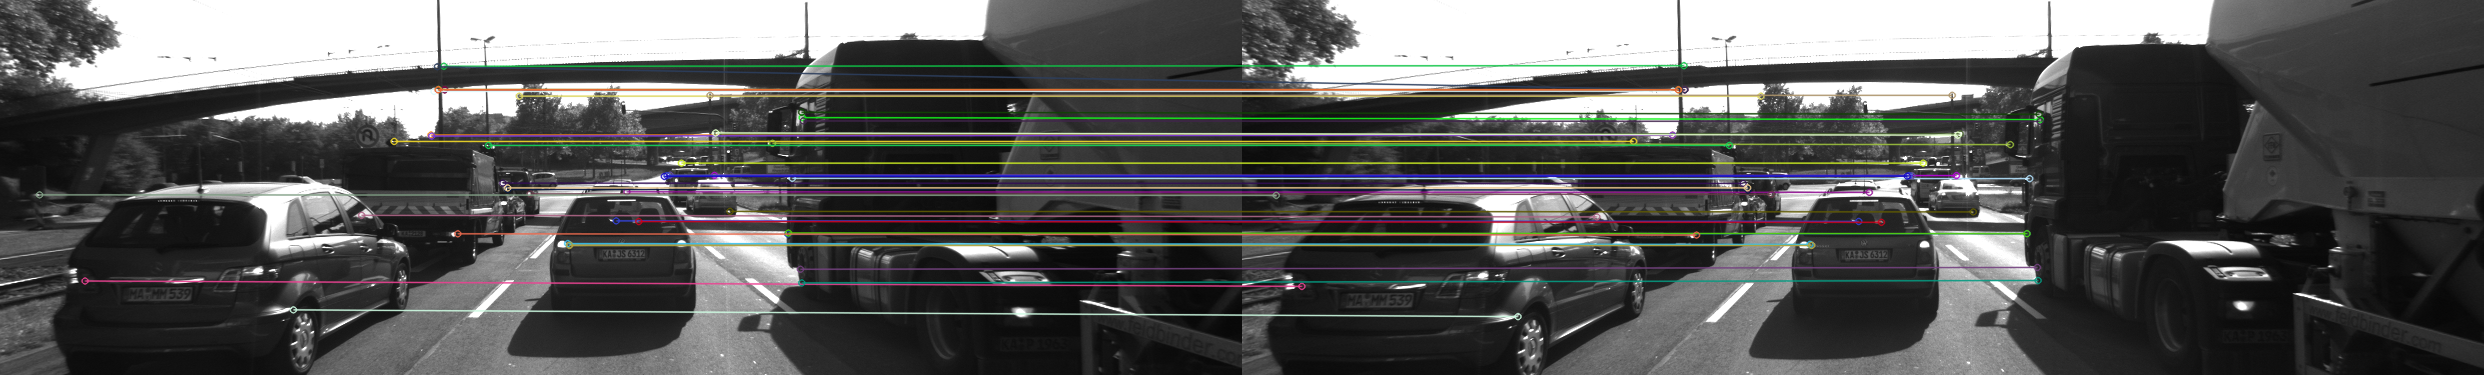

In [47]:
def match_descriptors(img_source, img_ref, kpts_source, kpts_ref, desc_source, desc_ref, matches, descriptor_type, matcher_type, selector_type):
    # Configure matcher
    cross_check = False
    if matcher_type == "MAT_BF":
        norm_type = cv2.NORM_HAMMING if descriptor_type == "DES_BINARY" else cv2.NORM_L2
        matcher = cv2.BFMatcher(norm_type, crossCheck=cross_check)
        print("BF matching cross-check=", cross_check)
    elif matcher_type == "MAT_FLANN":

        # Implement FLANN matching
        matcher = cv2.FlannBasedMatcher()
        print("FLANN matching")

    # Perform matching task
    if selector_type == "SEL_NN":
        # Nearest neighbor (best match)
        t = cv2.getTickCount()
        matches = matcher.match(desc_source, desc_ref)
        t = (cv2.getTickCount() - t) / cv2.getTickFrequency()
        print("(NN) with n=", len(matches), "matches in", 1000 * t / 1.0, "ms")
    elif selector_type == "SEL_KNN":
        # k nearest neighbors (k=2)
        t = cv2.getTickCount()
        knn_matches = matcher.knnMatch(desc_source, desc_ref, k=2)
        t = (cv2.getTickCount() - t) / cv2.getTickFrequency()
        print("(KNN) with n=", len(knn_matches), "matches in", 1000 * t / 1.0, "ms")

        # Filter matches using descriptor distance ratio test
        ratio_threshold = 0.8
        matches = [m1 for m1, m2 in knn_matches if m1.distance < ratio_threshold * m2.distance]
        print(len(knn_matches) - len(matches), "keypoints were removed")

    # Visualize results
    match_img = cv2.drawMatches(img_source, kpts_source, img_ref, kpts_ref, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    cv2_imshow(match_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example usage:
img_source = cv2.imread("im1mono.png")
img_ref = cv2.imread("im2mono.png")



matches = []
descriptor_type = "DES_BINARY"
matcher_type = "MAT_FLANN"
selector_type = "SEL_KNN"

match_descriptors(img_source, img_ref, k_source, k_reference, d_source, d_reference, matches, descriptor_type, matcher_type, selector_type)
